In [1]:
import matplotlib.pyplot as plt
import matplotlib
import numpy as np

import pandas as pd
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'
matplotlib.rcParams['font.size'] = 14

from matplotlib.ticker import ScalarFormatter, LogLocator


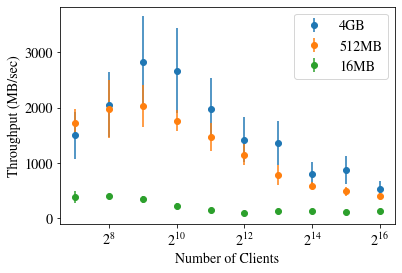

In [2]:
# NAIVE BRIDGES PLOT
output1 = 'basic-chare-benchmarks/bridges/results/512MB_32tasks_16nodes/summary.out'
output2 = 'basic-chare-benchmarks/bridges/results/16nodes_32tasks_4GB/summary.out'
output3 = 'basic-chare-benchmarks/bridges/results/16MB_32tasks_16nodes/summary.out'


fig, ax = plt.subplots()

file = output2
dataframe = pd.read_csv(file, sep=' ', header=None)
dataframe.columns = ['#Clients', 'run1', 'run2', 'run3', 'run4', 'run5', 'run6', 'run7', 'run8', 'run9', 'run10']
dataframe = dataframe[dataframe['#Clients'] >= 2**7]
dataframe = dataframe[dataframe['#Clients'] <= 2**16]
dataframe['Time'] = dataframe.iloc[:, 1:].mean(axis=1)
dataframe['TP'] = 4 * 1024 / dataframe['Time']
plt.errorbar(dataframe['#Clients'], dataframe['TP'], yerr=dataframe.iloc[:, 1:].std(axis=1), fmt='o')

file = output1
dataframe = pd.read_csv(file, sep=' ', header=None)
dataframe.columns = ['#PEs', 'Clients', 'Time']
dataframe['TP'] = 512 / dataframe['Time']
 
grouped = dataframe.groupby('Clients').agg(['mean', 'std'])
ax.errorbar(grouped.index, grouped['TP']['mean'], yerr=grouped['TP']['std'], fmt='o')


file = output3
dataframe = pd.read_csv(file, sep=' ', header=None)
dataframe.columns = ['#PEs', 'Clients', 'Time']
dataframe['TP'] = 16 / dataframe['Time']
 
grouped = dataframe.groupby('Clients').agg(['mean', 'std'])
ax.errorbar(grouped.index, grouped['TP']['mean'], yerr=grouped['TP']['std'], fmt='o')

# plot setup
ax.set_xscale('log', base=2)

ax.get_yaxis().set_tick_params(which='minor', size=0)
ax.get_yaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())

plt.xlabel('Number of Clients')
plt.ylabel('Throughput (MB/sec)')
plt.legend([ '4GB', '512MB', '16MB'])
plt.savefig('figures/bridges_naive.pdf', bbox_inches='tight', format='pdf')

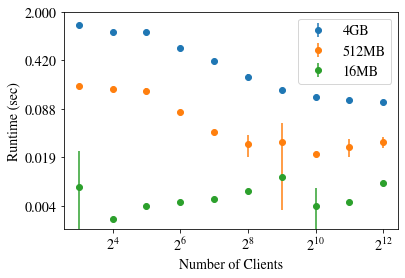

In [3]:
# GENERATING NAIVE DATA PLOT WITH 16 NODES, 32 TPN
output1 = "basic-chare-benchmarks/frontier/results/odfr16nodes512tasks4096MB.out"
output2 = "basic-chare-benchmarks/frontier/results/odfr16nodes512tasks512MB.out"
output3 = "basic-chare-benchmarks/frontier/results/odfr16nodes512tasks16MB.out"

fig, ax = plt.subplots()

for file in [output1, output2, output3]:
    dataframe = pd.read_csv(file, sep=' ', header=None)
    dataframe.columns = ['#PEs', 'Clients', 'Time']
    
    grouped = dataframe.groupby('Clients').agg(['mean', 'std'])
    ax.errorbar(grouped.index, grouped['Time']['mean'], yerr=grouped['Time']['std'], fmt='o')

# plot setup
ax.set_xscale('log', base=2)
ax.set_yscale('log')

ax.set_yticks(np.logspace(-8, 1, num = 5, base=2))
ax.get_yaxis().set_tick_params(which='minor', size=0)
ax.get_yaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())

plt.xlabel('Number of Clients')
plt.ylabel('Runtime (sec)')
plt.legend(['4GB', '512MB', '16MB'])

/jet/home/mtaylor5/ckio-testsuite/.venv/lib64/python3.6/site-packages/ipykernel_launcher.py:19: MatplotlibDeprecationWarning: The 'basex' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.


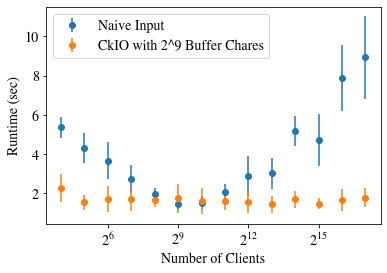

In [9]:
# PLOT 2 for the paper: FOR NAIVE VS CKIO

### plot basic summary data as BC vs average time (with error bars) ###
summary_file = 'basic-chare-benchmarks/bridges/results/16nodes_32tasks_4GB/summary.out'
ckio_file = 'ckio-benchmarks/old-results/bridges/16nodes-32tasks-4GB-2^9BC.out'


# read data in format (chares, 10 runs)
summary_data = pd.read_csv(summary_file, sep=' ', header=None)
summary_data.columns = ['#BC', 'run1', 'run2', 'run3', 'run4', 'run5', 'run6', 'run7', 'run8', 'run9', 'run10']
plt.errorbar(summary_data['#BC'], summary_data.iloc[:, 1:].mean(axis=1), yerr=summary_data.iloc[:, 1:].std(axis=1), fmt='o')

# read data in format (chares, 10 runs)
ckio_summary = pd.read_csv(ckio_file, sep=' ', header=None)
ckio_summary.columns = ['#PEs', '#BC', 'run1', 'run2', 'run3', 'run4', 'run5', 'run6', 'run7', 'run8', 'run9', 'run10']
plt.errorbar(ckio_summary['#PEs'], ckio_summary.iloc[:, 2:].mean(axis=1), yerr=ckio_summary.iloc[:, 2:].std(axis=1), fmt='o')

# plot setup
plt.xscale('log', basex=2)
plt.xlabel('Number of Clients')
plt.ylabel('Runtime (sec)')
#plt.title('4GB File Read, 16 Nodes (2^9 PEs) on Bridges2')
plt.legend(['Naive Input', 'CkIO with 2^9 Buffer Chares'])
plt.savefig('4gb-bridges-ckio-naive.pdf', bbox_inches='tight', format='pdf')

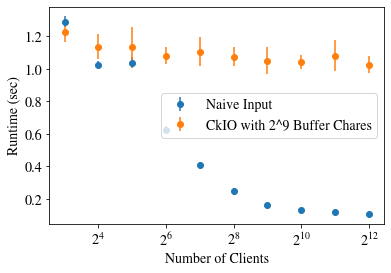

In [5]:
# PLOT 2 for the paper: FOR NAIVE VS CKIO on FRONTIER

### plot basic summary data as BC vs average time (with error bars) ###
summary_file = 'basic-chare-benchmarks/frontier/results/odfr16nodes512tasks4096MB.out'
ckio_file = 'ckio-benchmarks/frontier/results/vary-clients-16nodes512tasks2^6bc.out'

# read data in format (chares, 10 runs)
summary_data = pd.read_csv(summary_file, sep=' ', header=None)
summary_data.columns = ['PEs', 'clients', 'time']
grouped = summary_data.groupby('clients').agg(['mean', 'std'])
plt.errorbar(grouped.index, grouped['time']['mean'], yerr=grouped['time']['std'], fmt='o')

# read data in format (chares, 10 runs)
ckio_summary = pd.read_csv(ckio_file, sep=' ', header=None)
ckio_summary.columns = ['clients', 'bc', 'pes', 'size', 'bg', 'time']
grouped = ckio_summary.groupby('clients').agg(['mean', 'std'])
plt.errorbar(grouped.index, grouped['time']['mean'], yerr=grouped['time']['std'], fmt='o')

# plot setup
plt.xscale('log', base=2)
plt.xlabel('Number of Clients')
plt.ylabel('Runtime (sec)')
#plt.title('4GB File Read, 16 Nodes (2^9 PEs) on Bridges2')
plt.legend(['Naive Input', 'CkIO with 2^9 Buffer Chares'])

FileNotFoundError: [Errno 2] No such file or directory: 'mpi-benchmarks/1GBnooutliers.out'

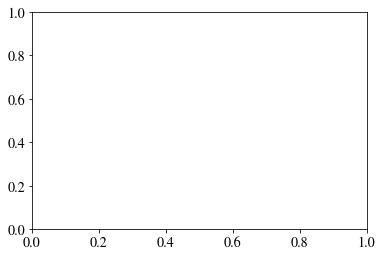

In [23]:
# MPI COMPARISON

# GENERATING NAIVE DATA PLOT WITH 16 NODES, 32 TPN
output1 = "mpi-benchmarks/1GBnooutliers.out"
output2 = "basic-chare-benchmarks/bridges/results/1GB_32tpn.out"


fig, ax = plt.subplots()

for file in [output1, output2]:
    dataframe = pd.read_csv(file, sep=' ', header=None)
    dataframe.columns = ['#PEs', 'Misc', 'Time']
    
    grouped = dataframe.groupby('#PEs').agg(['mean', 'std'])
    ax.errorbar(grouped.index, grouped['Time']['mean'], yerr=grouped['Time']['std'], fmt='o')


# plot setup
ax.set_xscale('log', base=2)



plt.xlabel('Number of PEs')
plt.ylabel('Runtime (sec)')
plt.legend(['MPI', "Naive Charm"])

plt.savefig('figures/mpi-naive-comparison.pdf', bbox_inches='tight', format='pdf')